<a href="https://colab.research.google.com/github/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/blob/main/Topic_Modeling_(Aspek).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings; warnings.simplefilter('ignore')
import nltk

!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py

!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

!mkdir CSV
!wget -P CSV/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/CSV/PREPROSS.csv

!pip install spacy python-crfsuite unidecode textblob sastrawi
!python -m spacy download en
!python -m spacy download xx
!python -m spacy download en_core_web_sm

nltk.download('popular')

--2021-08-14 07:03:21--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16713 (16K) [text/plain]
Saving to: ‘taudataNlpTm.py’

taudataNlpTm.py     100%[===================>]  16.32K  --.-KB/s    in 0s      

2021-08-14 07:03:21 (38.0 MB/s) - ‘taudataNlpTm.py’ saved [16713/16713]

--2021-08-14 07:03:21--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29041 (28K) 

True

In [2]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import taudataNlpTm as tau, itertools, re, pickle, spacy, urllib.request
import time, numpy as np, matplotlib.pyplot as plt, networkx as nx, pandas as pd, seaborn as sns 
from matplotlib.colors import ListedColormap
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tag import CRFTagger
from gensim.models import Phrases
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from gensim.models import Word2Vec, FastText
import tweepy, json, nltk, urllib.request, requests
from urllib.request import Request, urlopen


sns.set(style="ticks", color_codes=True)
random_state = 99
'Done'

'Done'

In [5]:
df = pd.read_csv('CSV/PREPROSS.csv')
df.head()

,Unnamed: 0,At,Sentimen,Review,Bintang,Aspek,data_cleaned_aspek
0,0,2020-10-18 19:32:19,1,gud,5,Lainnya,good
1,1,2020-10-17 20:18:47,1,"Seneng belanja disini karna dah pastinya ori, ...",5,Layanan,belanja original bayar diskon responsif metode...
2,2,2020-10-17 07:44:22,-1,"Pertamakali order langsung kecewa, di cancel k...",1,Layanan,kecewa cancel kosong proses uang sulit check o...
3,3,2020-10-17 05:29:05,-1,Sociolla parah. Proses refund gak tau harus nu...,1,Layanan,parah proses refund masuk kerja uang 775 43...
4,4,2020-10-17 00:12:18,-1,Sy order 4 product di tanggal 11 september dan...,1,Layanan,product tanggal 11 september udah 16 oktob...


In [6]:
data = df['data_cleaned_aspek'].values.astype('U')
dataa = [d for d in data]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()

tf = tf_vectorizer.fit_transform(dataa)
tf_terms = tf_vectorizer.get_feature_names()
 
tf.shape

(2073, 1823)

In [8]:
# Dilanjutkan dengan membentuk model LDA-nya
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 12 # Misal tidak di optimalkan terlebih dahulu
lda = LDA(n_components=n_topics, learning_method='batch', random_state=99).fit(tf)   
lda

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=12, n_jobs=None,
                          perp_tol=0.1, random_state=99, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [9]:
vsm_topics = lda.transform(tf)
print(vsm_topics.shape)
vsm_topics

(2073, 12)


array([[0.04166667, 0.04166667, 0.04166667, ..., 0.04166667, 0.04166667,
        0.04166667],
       [0.49535513, 0.00595285, 0.0059524 , ..., 0.00595251, 0.00595259,
        0.00595271],
       [0.00362333, 0.00362325, 0.96014428, ..., 0.0036232 , 0.00362338,
        0.00362322],
       ...,
       [0.04166667, 0.04166667, 0.04166667, ..., 0.04166667, 0.04166667,
        0.04166667],
       [0.39815771, 0.0208334 , 0.02083363, ..., 0.02083379, 0.02083335,
        0.39350408],
       [0.01190487, 0.01190498, 0.01190502, ..., 0.01190486, 0.01190502,
        0.0119057 ]])

In [10]:
# "Seandainya" diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topic terbesar
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
doc_topic[:10]

100%|██████████| 2073/2073 [00:00<00:00, 274214.46it/s]


[9, 1, 3, 3, 11, 11, 11, 3, 10, 3]

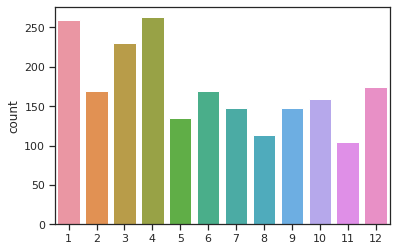

In [11]:
plot = sns.countplot(doc_topic)

In [12]:
# Mari kita coba maknai masing-masing topic ini
Top_Words = 25
print('Printing top {0} Topics, with top {1} Words:'.format(n_topics, Top_Words))
tau.print_Topics(lda, tf_terms, n_topics, Top_Words)

Printing top 12 Topics, with top 25 Words:
Topic #1:
suka belanja diskon sulit produk beli ya moga bagus out original harga lengkap soco tutup bug mudah cepat promo henti check paket sukses cantik web
Topic #2:
bagus bantu udah belanja error masuk refund website ya nyata lupa doang tekan kecewa parah emosi layan kosong cari diskon overall crash tf buruk tanggap
Topic #3:
update pinta udah buka kecewa habis refund ya uninstall install masuk perintah kosong soco diupdate sulit beli kesal sampe suruh log stock uang mutar parah
Topic #4:
nan error lambat upgrade connection nice nge super jaring shopping kecewa buka masuk tambahin lag install sulit baharu internet not sinyal baca diskon shop gin
Topic #5:
buka belanja produk beli web kesal ya udah error sulit kecewa soco kosong lihat you males skincare salah isi thank hilang refund reset masuk tampil
Topic #6:
produk lihat mantap beli buka detail tarik search diskon product lengkap shop halaman home cepet add parah online bagus kuota masuk 

In [13]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 5.2 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=b88cb7e0b0d7e87fbd2cc501c946fd63e9eebcbeea4a635ef40876a9cc666188
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [14]:
# %matplotlib inline
# Mari kita Plot, supaya lebih jelas
# Catatan, bergantung dari laptop yang digunakan, image terkadang cukup lama untuk muncul.
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()

ldavis = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
ldavis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.071004 -0.175032       1        1  13.291927
0     -0.181150  0.039186       2        1  12.371748
10     0.138823 -0.163687       3        1  10.619828
11    -0.085970 -0.107789       4        1   9.199863
9     -0.138409  0.076183       5        1   9.154912
4     -0.079936 -0.061277       6        1   9.104225
5     -0.106584  0.058366       7        1   7.305093
1      0.024031  0.033083       8        1   7.115916
6     -0.067867 -0.000013       9        1   6.991171
3      0.134772  0.196578      10        1   5.870042
7      0.128636 -0.017075      11        1   5.401363
8      0.162649  0.121475      12        1   3.573911, topic_info=          Term        Freq       Total Category  logprob  loglift
1730    update  207.000000  207.000000  Default  30.0000  30.0000
1577      suka  183.000000  183.000000  Default  29.0000  29.0000
145      bagus  193.000000  193.000000  Default  28.0000  28.0000
1050       nan  115.000000  115.000000  Default  27.0000  27.0000
585       good   78.000000   78.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
1188     paket    1.526873   22.925979  Topic12  -5.5256   0.6225
979      masuk    1.831840   77.345487  Topic12  -5.3435  -0.4115
170      bantu    1.600382   51.701529  Topic12  -5.4786  -0.1437
616      harga    1.412219   37.873166  Topic12  -5.6037   0.0424
1509  skincare    1.117588   49.342559  Topic12  -5.8376  -0.4561

[721 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         3  0.196210    00
0         8  0.784842    00
2         1  0.582704    10
2         3  0.083243    10
2         8  0.166487    10
...     ...       ...   ...
1811      9  0.059279    ya
1811     11  0.014820    ya
1818      6  0.845978   you
1818      9  0.076907   you
1821     11  0.593741  yqng

[1275 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 11, 12, 10, 5, 6, 2, 7, 4, 8, 9])

In [15]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(dataa)
nmf_model = NMF(n_components = 12, random_state=0)
nmf = nmf_model.fit(tfidf)

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
tau.print_Topics(nmf, tfidf_feature_names, n_topics, Top_Words)


Topics in NMF model:
Topic #1:
nan zonk handphonenya ha habis hadap hadiah hadir hah hair halaman halilintar hambat handphone handuk guardian hape happy hapus harap harga hari harian hasil hbximyevg
Topic #2:
bagus promo skincare banget moga koneksi jaring lengkap sinyal brand diskon tampil cantik soco bantu event lancar kosmetik log wifi layan beli dimasukin jual paket
Topic #3:
good job so love one very feeling euyy for skincare application it aplication promo enough but many think mudah lambat gopaynya gojek rekomend sale all
Topic #4:
update pinta dikit perintah udah suruh kesal kecewa install males ganggu nyaman habis uninstall soco updatenya nyampe diupdate upgrade sampe kuota asa an akses ad
Topic #5:
suka henti diskon tutup soco loading promo packing view pilih product moga bantu loadingnya kualitas pinta sndiri sukses socobox discount shopping mi log aplikasinyaa siciolla
Topic #6:
buka henti udah diupdate close web install shop force sinyal kesal tutup parah loading soco men

In [16]:
# Sama seperti LDA kita bisa melihat distribusi topic setiap dokumen
vsm_topics = nmf.transform(tfidf)
vsm_topics[:10]

array([[0.00000000e+00, 0.00000000e+00, 3.37249054e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.37666627e-02, 0.00000000e+00, 0.00000000e+00,
        1.28101083e-01, 0.00000000e+00, 1.36980854e-03, 8.64672814e-02,
        6.90777638e-03, 9.83090824e-02, 3.96810648e-04, 1.62685542e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.55496097e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.37749564e-04,
        0.00000000e+00, 7.70897929e-03, 6.88672728e-02, 3.18684649e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.59294971e-03,
        0.00000000e+00, 5.70635550e-03, 0.00000000e+00, 3.02688950e-03,
        0.00000000e+00, 1.08560027e-02, 8.68340676e-03, 9.12127623e-02],
       [0.00000000e+00, 3.19174779e-04, 9.45257085e-05, 6.06660424e-03,
        2.75791956e-04, 9.79203761e-03, 0.00000000e+00, 7.58

100%|██████████| 2073/2073 [00:00<00:00, 267392.20it/s]


In total there are 12 major topics, distributed as follows


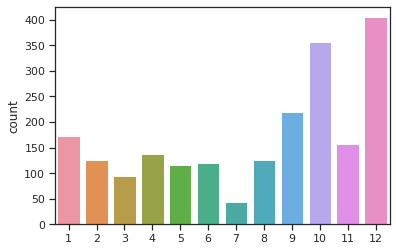

In [17]:
# Seandainya diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topic terbesar
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
print('In total there are {0} major topics, distributed as follows'.format(len(set(doc_topic))))
sns.countplot(doc_topic)
plt.show()